Epoch 1/50
6/6 [==============================] - 0s 21ms/step - loss: 112.7911 - mean_absolute_percentage_error: 112.7911 - val_loss: 99.8304 - val_mean_absolute_percentage_error: 99.8304
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 99.8699 - mean_absolute_percentage_error: 99.8699 - val_loss: 99.9820 - val_mean_absolute_percentage_error: 99.9820
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 99.9632 - mean_absolute_percentage_error: 99.9632 - val_loss: 99.9894 - val_mean_absolute_percentage_error: 99.9894
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 99.9755 - mean_absolute_percentage_error: 99.9755 - val_loss: 99.9906 - val_mean_absolute_percentage_error: 99.9906
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 99.9768 - mean_absolute_percentage_error: 99.9768 - val_loss: 99.9906 - val_mean_absolute_percentage_error: 99.9906
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - los

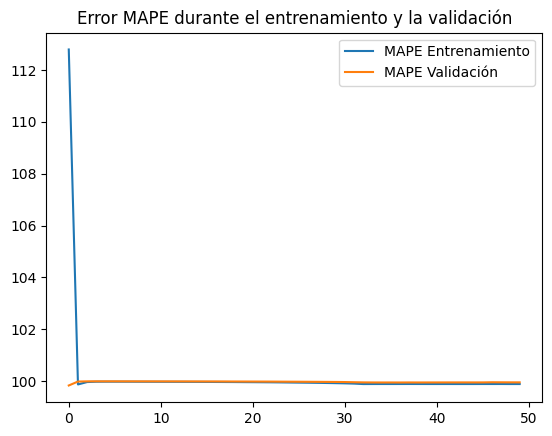

13/13 [==============================] - 0s 950us/step


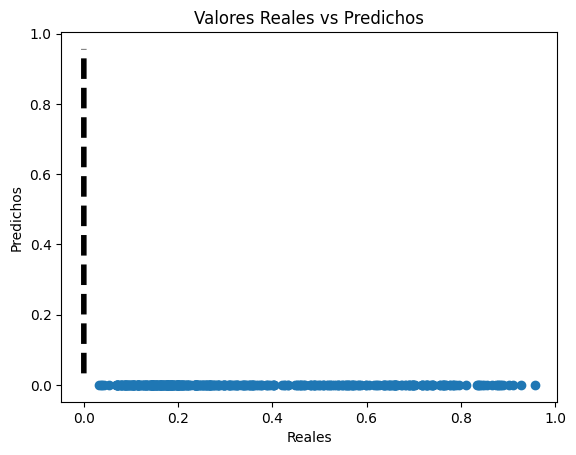

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt


learning_rate = 0.001
momentum = 0.8

data_path = '../datasets/electricity_load_forecasting-scaled.txt'
data = pd.read_csv(data_path, delimiter='\t', skiprows=1)
X = data.iloc[:, 1:].values  
y = data.iloc[:, 0].values  


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


model = keras.Sequential([
    Dense(9, activation='sigmoid', input_shape=(X_train.shape[1],)),    
    Dense(5, activation='sigmoid'),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid') 
])

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(optimizer=optimizer,
              loss='mape', 
              metrics=[tf.metrics.MeanAbsolutePercentageError()])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=300)

plt.plot(history.history['mean_absolute_percentage_error'], label='MAPE Entrenamiento')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='MAPE Validación')
plt.title('Error MAPE durante el entrenamiento y la validación')
plt.legend()
plt.show()

predictions = model.predict(X_val)

plt.scatter(y_val, predictions)
plt.plot([predictions.min(), predictions.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Linea de perfecta predicción
plt.title('Valores Reales vs Predichos')
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.show()
